# Solar Wind Boundary Conditions

Running the OpenGGCM `runme` will preprocess solar wind input data (either based on actual data, or a `swdata` file with synthetic solar wind conditions) and add it to the `in.<run>` file, which is read when actually running OpenGGCM and then used as the boundary condition for sunward boundary.

As part of the `runme` process, OpenGGCM will also generate a plot of these solar wind conditions, saved as `swplot.<run>.satpl.ps`. Since this is a postscript file, one may have to convert it before opening, e.g. using

```sh
$ ps2pdf swplot.cir07_19970227_liang_norcm.satpl.ps
$ open swplot.cir07_19970227_liang_norcm.satpl.pdf
```

OpenGGCM generally saves timeseries data in ASCII files, using a single file per quantity where each line has the the format `YEAR MONTH DAY HOUR MINUTE SECOND.FRACTION VALUE`.

`ggcmpy` supports reading those data files, and saving them as `pyspedas` tplot quantities, as demonstrated below.

Let's start with some Python setup.

In [25]:
from __future__ import annotations

import pyspedas

import ggcmpy
from ggcmpy.timeseries import (
    read_ggcm_solarwind_directory,
    read_ggcm_solarwind_file,
    store_to_pyspedas,
)


## Reading a single timeseries file

The function `ggcmpy.timeseries.read_ggcm_solarwind_file()` reads a single data file and returns it as a Pandas DataFrame.

<div class="alert alert-info">
**Note:** In the future, this function may change to return a `xarray.DataArray` instead, since this is what `pyspedas` uses internally, and it provides better support for attributes.
</div>

In [26]:
df = read_ggcm_solarwind_file(
    ggcmpy.sample_dir / "cir07_19970227_liang_norcm/tmp.minvar/om1997.rr"
)
df

,om1997.rr
datetime,
1997-02-27 10:00:00,2.22
1997-02-27 10:01:00,2.22
1997-02-27 10:02:00,2.21
1997-02-27 10:03:00,2.59
1997-02-27 10:04:00,1.99
...,...
1997-02-28 16:56:00,2.61
1997-02-28 16:57:00,2.51
1997-02-28 16:58:00,2.51


## Reading multiple timeseries files from a directory

You can also read all timeseries files from a directory using the `read_ggcm_solarwind_directory()` function. 
This function will return a Pandas DataFrame with multiple columns. In addition, using heuristics, attributes
will be added naming the quantities and adding units.


In [27]:
df = read_ggcm_solarwind_directory(
    ggcmpy.sample_dir / "cir07_19970227_liang_norcm/tmp.minvar", "om1997*gse"
)
df

,om1997.vzgse,om1997.bzgse,om1997.vygse,om1997.bygse,om1997.bxgse,om1997.vxgse
datetime,,,,,,
1997-02-27 10:00:00,-44.20,-2.99,36.0,-1.51,1.640,-457.7
1997-02-27 10:01:00,-44.20,-2.99,36.0,-1.51,1.640,-457.7
1997-02-27 10:02:00,-46.40,-2.03,25.3,-2.45,1.960,-457.6
1997-02-27 10:03:00,-36.00,-1.68,11.9,-2.08,2.270,-438.1
1997-02-27 10:04:00,-15.80,-0.83,18.9,-1.98,3.050,-450.7
...,...,...,...,...,...,...
1997-02-28 16:56:00,-6.45,-0.85,-11.1,-3.46,3.725,-555.4
1997-02-28 16:57:00,-12.30,-1.20,-12.8,-2.97,4.030,-551.1
1997-02-28 16:58:00,-12.30,-0.68,-12.8,-4.11,3.100,-551.1


In [28]:
df["om1997.bzgse"].attrs

{'long_name': 'OMNI 1997 Bz in GSE Coordinates',
 'name': 'Bz (GSE)',
 'units': 'nT'}

## Storing timeseries data in pyspedas

The function `store_to_pyspedas()` will take a pandas DataFrame, as generated by the functions above, and store
it as a pyspedas tplot variable for easy plotting:

yaxis_options: {'axis_label': 'Bz (GSE)', 'crosshair': 'Y', 'y_axis_type': 'linear', 'y_range': [np.float64(-13.04), np.float64(12.06)], 'legend_names': ['Bz (GSE)'], 'axis_subtitle': 'nT'}


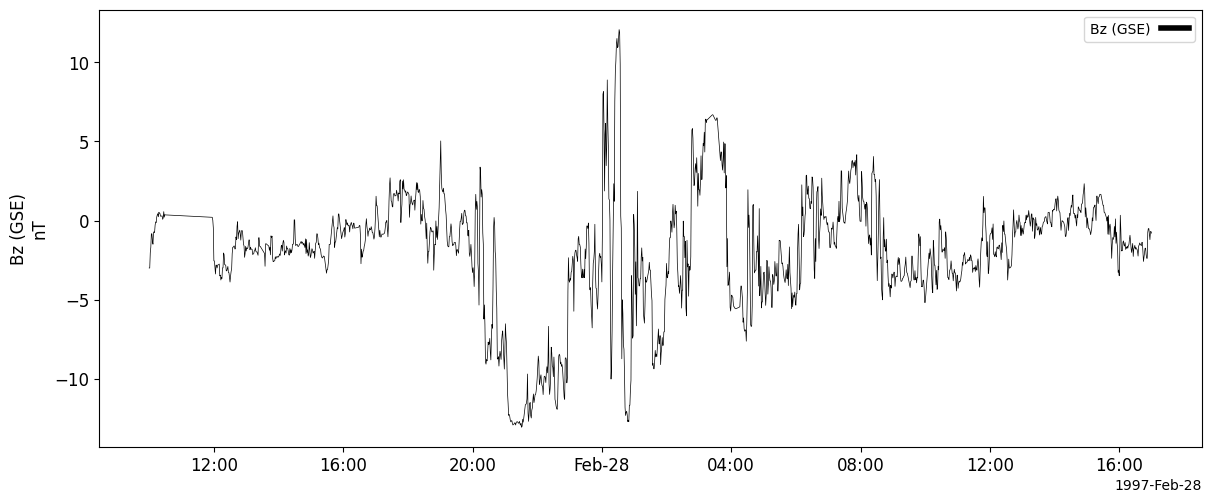

In [32]:
store_to_pyspedas(df)
pyspedas.tplot("om1997.bzgse")

<div class="alert alert-info">
**ToDo:** The function above does not yet automatically generate tplot vector variables. For now, one can use pyspedas to do so:
</div>

yaxis_options: {'axis_label': 'Bx (GSE)', 'crosshair': 'Y', 'y_axis_type': 'linear', 'y_range': [np.float64(-15.03), np.float64(13.6)], 'legend_names': ['Bx (GSE)'], 'axis_subtitle': 'nT', 'y_range_user': True, 'y_axis_style': 'linear'}
yaxis_options: {'axis_label': 'By (GSE)', 'crosshair': 'Y', 'y_axis_type': 'linear', 'y_range': [np.float64(-15.03), np.float64(13.6)], 'legend_names': ['By (GSE)'], 'axis_subtitle': 'nT', 'y_range_user': True, 'y_axis_style': 'linear'}
yaxis_options: {'axis_label': 'Bz (GSE)', 'crosshair': 'Y', 'y_axis_type': 'linear', 'y_range': [np.float64(-15.03), np.float64(13.6)], 'legend_names': ['Bz (GSE)'], 'axis_subtitle': 'nT', 'y_range_user': True, 'y_axis_style': 'linear'}


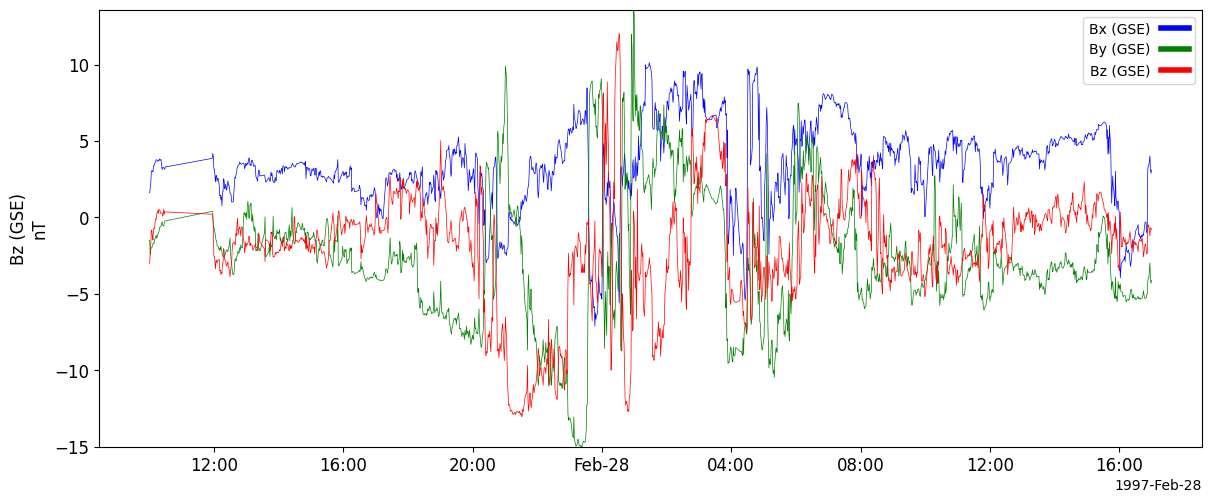

In [41]:
pyspedas.options("om1997.bxgse", "color", "blue")
pyspedas.options("om1997.bygse", "color", "green")
pyspedas.options("om1997.bzgse", "color", "red")
pyspedas.store_data("om1997.bgse", ["om1997.bxgse", "om1997.bygse", "om1997.bzgse"])
pyspedas.tplot("om1997.bgse")